12238
12238


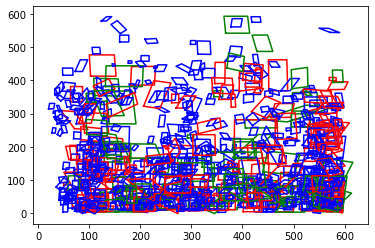

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import h5py

x_train = []
y_train = []
file_name = 'SynthText.h5'
db = h5py.File('C:\\Users\\gilad\\Desktop\\font\\SynthText.h5', 'r')
im_names = list(db['data'].keys())
for k in range (0,760):
        im = im_names[k]
        imgs = db['data'][im][:]
        font = db['data'][im].attrs['font']
        txt = db['data'][im].attrs['txt']
        charBB = db['data'][im].attrs['charBB']
        wordBB = db['data'][im].attrs['wordBB']


        font_name = ['Skylark', 'Ubuntu Mono', 'Sweet Puppy']
        nC = charBB.shape[-1]
        for b_inx in range(nC):
            if(font[b_inx].decode('UTF-8')==font_name[0]):
                color = 'r'
            elif(font[b_inx].decode('UTF-8')==font_name[1]):
                color = 'b'
            else:
                color = 'g'
        bb = charBB[:,:,b_inx]
        x = np.append(bb[0,:], bb[0,0])
        y = np.append(bb[1,:], bb[1,0])
        plt.plot(x, y, color)
        nW = wordBB.shape[-1]
        for b_inx in range(nW):
            bb = wordBB[:,:,b_inx]
            x = np.append(bb[0,:], bb[0,0])
            y = np.append(bb[1,:], bb[1,0])
            i=0
        for i in range(len(charBB[0,0])):
            pts1 = np.float32([charBB[:,:,i].T[0],charBB[:,:,i].T[1],charBB[:,:,i].T[3],charBB[:,:,i].T[2]])
            pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])
            M = cv2.getPerspectiveTransform(pts1,pts2)
            dst = cv2.warpPerspective(imgs,M,(400,400))
            dst = (dst/255.).astype(np.float16)
            x_train.append(dst)
            y_train.append(font[i].decode('UTF-8'))
print (len(x_train))
print (len(y_train))

In [4]:
import tensorflow
from tensorflow.keras.utils import to_categorical
def to_numeric(x):
    return [0 if i=='Ubuntu Mono' else 1 if i=='Skylark' else 2 for i in x]
y_train = to_numeric(y_train)

In [20]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=3)
# If the notebook doesn't work, remove astype from next line:
y_train = tensorflow.constant(y_train, shape=[12238,3]).astype(np.float16)
print(y_train[10])


TypeError: Eager execution of tf.constant with unsupported shape (value has 991278 elements, shape is (12238, 3) with 36714 elements).

In [21]:
y_train

array([[[[[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]],

         [[1., 0., 0.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]]],


        [[[1., 0., 0.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]]],


        [[[1., 0., 0.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]]]],



       [[[[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]],

         [[1., 0., 0.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
          [1., 0., 0.],
          [1., 0., 0.]]],


        [[[1., 0., 0.],
          [0., 1., 0.],
          [1., 0., 0.]],

         [[0., 1., 0.],
    

In [6]:

x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
x_train[0]

array([[[0.6943, 0.4824, 0.3293],
        [0.698 , 0.4863, 0.3333],
        [0.698 , 0.4863, 0.3333],
        ...,
        [0.71  , 0.498 , 0.3137],
        [0.71  , 0.498 , 0.3098],
        [0.71  , 0.498 , 0.3098]],

       [[0.698 , 0.4863, 0.3333],
        [0.702 , 0.4902, 0.3372],
        [0.702 , 0.4902, 0.3372],
        ...,
        [0.714 , 0.502 , 0.3176],
        [0.714 , 0.502 , 0.3137],
        [0.714 , 0.502 , 0.3137]],

       [[0.706 , 0.4941, 0.3372],
        [0.706 , 0.4941, 0.3372],
        [0.71  , 0.498 , 0.341 ],
        ...,
        [0.7217, 0.506 , 0.3215],
        [0.7217, 0.506 , 0.3215],
        [0.7217, 0.506 , 0.3215]],

       ...,

       [[0.6743, 0.4548, 0.2864],
        [0.6743, 0.4548, 0.2864],
        [0.6743, 0.451 , 0.2825],
        ...,
        [0.612 , 0.3765, 0.2274],
        [0.608 , 0.3765, 0.2274],
        [0.612 , 0.3765, 0.2274]],

       [[0.6743, 0.451 , 0.2864],
        [0.6704, 0.451 , 0.2825],
        [0.6704, 0.451 , 0.2825],
        .

In [122]:
from tensorflow.keras import models
from tensorflow.keras import layers 


def initialize_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(4,2), activation='relu', return_sequences=True))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [123]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [124]:
model = initialize_model()
model.summary()

TypeError: ('Keyword argument not understood:', 'return_sequences')

In [125]:
##############
### Answer ###
##############

from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()
model = compile_model(model)

es = EarlyStopping(patience=5, verbose=1)

history = model.fit(x_train, y_train, 
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=100, 
                    batch_size=32)

TypeError: ('Keyword argument not understood:', 'return_sequences')